In [22]:
from numpy.random import seed
from numpy.random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
#Begin with the base code for selection sort as described in chapter 2 
#of Grokking Algorithms (Bhargava 2016).

In [24]:
# We start with a function that finds the smallest value in our array

def findSmallest(arr):
    smallest = arr[0] # stores the smallest value
    smallestIndex = 0 # stores the index of the smallest value
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallestIndex = i
    return smallestIndex

In [25]:
# Our findSmallest function can be used in the selection sort algorithm

def selectionSort(arr):
    newArr = []
    arrList = arr.tolist()
    for i in range(len(arrList)):
        smallest = findSmallest(arrList) #Finds the smallest in the array
        newArr.append(arrList.pop(smallest))
    return newArr

In [26]:
#Compare alternative sorting algorithms.
# Here, we'll use a sorting algorithm that works on numpy arrays without needing pop or
# to convert to a list

def selectionSort2(arr):
    arr = np.array(arr)
    for i in range(len(arr)):
        j = arr[i:].argmin()
        arr[i], arr[i + j] = arr[i + j], arr[i]
    return arr



In [27]:
#Set up five data arrays (5,000 numbers, 10,000 numbers, 15,000 numbers, 20,000 numbers, 
#and 25,000 numbers) using a uniform random number generator. 
#Ensure that a common random number seed is used to generate each of the arrays. 
#(If relevant to this assignment) Follow general course instructions for setting the 
#seed value of the random number generator.


#Instead of creating arrays one-by-one, we'll use a loop to create a dict of arrays
#The size of the array is our key and the array is our value

arraySizes = (5000, 10000, 15000, 20000, 25000)

myArray = dict()

for size in arraySizes:
    seed(7769)
    myArray[size] = randint(99999, size = size)



In [28]:
#Execute the base algorithm for each of the random number arrays, 
#noting the execution time with each execution. 


#Let's make our runtime variables for the grokking algorithms book example array

start = time.clock()
sort5k = selectionSort(myArray[5000])
stop  = time.clock()
time5k = stop - start

start = time.clock()
sort10k = selectionSort(myArray[10000])
stop  = time.clock()
time10k = stop - start

start = time.clock()
sort15k = selectionSort(myArray[15000])
stop = time.clock()
time15k = stop - start

start = time.clock()
sort20k = selectionSort(myArray[20000])
stop = time.clock()
time20k = stop - start

start = time.clock()
sort25k = selectionSort(myArray[25000])
stop = time.clock()
time25k = stop - start


In [29]:
#Let's go through this same process with our second sort algorithm
start = time.clock()
sort5k2 = selectionSort2(myArray[5000])
stop  = time.clock()
time5k2 = stop - start

start = time.clock()
sort10k2 = selectionSort2(myArray[10000])
stop  = time.clock()
time10k2 = stop - start

start = time.clock()
sort15k2 = selectionSort2(myArray[15000])
stop = time.clock()
time15k2 = stop - start

start = time.clock()
sort20k2 = selectionSort2(myArray[20000])
stop = time.clock()
time20k2 = stop - start

start = time.clock()
sort25k2 = selectionSort2(myArray[25000])
stop = time.clock()
time25k2 = stop - start


In [30]:
#We'll try this same sort with numpy's built-in sort

start = time.clock()
sort5k3 = np.sort(myArray[5000])
stop  = time.clock()
time5k3 = stop - start

start = time.clock()
sort10k3 = np.sort(myArray[10000])
stop  = time.clock()
time10k3 = stop - start

start = time.clock()
sort15k3 = np.sort(myArray[15000])
stop = time.clock()
time15k3 = stop - start

start = time.clock()
sort20k3 = np.sort(myArray[20000])
stop = time.clock()
time20k3 = stop - start

start = time.clock()
sort25k3 = np.sort(myArray[25000])
stop = time.clock()
time25k3 = stop - start


In [31]:
#Organize the results of the study into an table showing the size of data array and 
#the time taken to analyze the array. Compare alternative sorting algorithms.


timeTable = pd.DataFrame(np.array([['ArraySize', 'grokkingSortTime', 'Numpy-based Sort Time', 
                                    'Built-In Numpy Sort'],
                     [5000, round(time5k,6), round(time5k2,6), round(time5k3,6)],
                     [10000, round(time10k,6), round(time10k2,6), round(time10k3,6)],
                     [15000, round(time15k,6), round(time15k2,6), round(time15k3,6)],
                     [20000, round(time20k,6), round(time20k2,6), round(time20k3,6)],
                     [25000, round(time25k,6), round(time25k2,6), round(time25k3,6)]]))
print("Table 1: Run times for various sort algorithms, rounded to 6 digits:")
timeTable


Table 1: Run times for various sort algorithms, rounded to 6 digits:


,0,1,2,3
0,ArraySize,grokkingSortTime,Numpy-based Sort Time,Built-In Numpy Sort
1,5000,0.610887,0.041373,0.001335
2,10000,2.719221,0.091125,0.002824
3,15000,5.60214,0.178453,0.002187
4,20000,14.415737,0.302538,0.001739
5,25000,19.724495,0.449776,0.00244


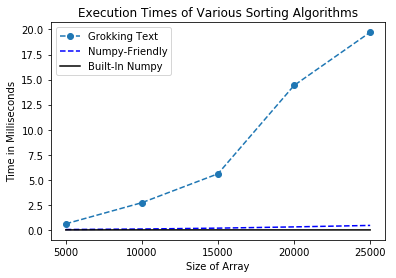

Chart 1


In [35]:
#Use Python matplotlib or Seaborn to generate a measure of the size of the data 
#set on the horizontal axis and with execution time in milliseconds on 
#the vertical axis. The plot should show execution time against problem size 
#for each form of the algorithm being tested.

plt.plot([5000, 10000, 15000, 20000, 25000],
        [time5k, time10k, time15k, time20k, time25k],
        'o--',
        [5000, 10000, 15000, 20000, 25000],
        [time5k2, time10k2, time15k2, time20k2, time25k2],
        'b--',
        [5000, 10000, 15000, 20000, 25000],
        [time5k3, time10k3, time15k3, time20k3, time25k3],
        'k-')
plt.xlabel('Size of Array')
plt.ylabel('Time in Milliseconds')
plt.title('Execution Times of Various Sorting Algorithms')
plt.legend(['Grokking Text', 'Numpy-Friendly', 'Built-In Numpy'])
plt.xticks(np.arange(5000, 30000, 5000))
plt.show()
print("Chart 1")

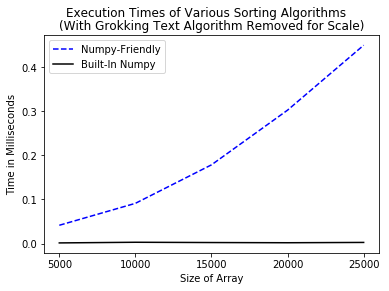

Chart 2


In [36]:
plt.plot(
        [5000, 10000, 15000, 20000, 25000],
        [time5k2, time10k2, time15k2, time20k2, time25k2],
        'b--',
        [5000, 10000, 15000, 20000, 25000],
        [time5k3, time10k3, time15k3, time20k3, time25k3],
        'k-')
plt.xlabel('Size of Array')
plt.ylabel('Time in Milliseconds')
plt.suptitle('Execution Times of Various Sorting Algorithms')
plt.title('(With Grokking Text Algorithm Removed for Scale)')
plt.legend([ 'Numpy-Friendly', 'Built-In Numpy'])
plt.xticks(np.arange(5000, 30000, 5000))
plt.show()
print("Chart 2")

In [34]:
#Prepare a executive summary of your results, 
#referring to the table and figures you have generated. 
#Explain how your results relate to big O notation. 
#Describe your results in language that management can understand. 
#This summary should be included as comments or text paragraphs in the Jupyter notebook. 
#Explain how the algorithm works and why it is a useful to data engineers.

### Executive Summary

Sorting algorithms are such a commom practice in data science that it is often easy to overlook their importance. By being used so often, they become "second nature" to the point where they don't even seem to be part of the analysis.

However, specifically *because* they are so common, performing sorts efficiently is intergral to keeping the overhead of data intensive applications low.

In the above sections, we compared the run times of three sorting algorithms: in the first, we used the method outlined in the text, *'Grokking Algorithms'* (Sort 1 hereafter); in the second, we used an algorithm that was more 'friendly' to a particular, commonly used Python package (Sort 2); in the third, we used the built-in algorithm found in that package (Sort 3).

Table 1 shows us the results, but figures to six decimal places can be tough to decipher, so we also graphed the results.

In Chart 1 above, it is clear that Sort 1 performed the poorest. In Big O notation, we would describe it as O(n<sup>2</sup>). Sort 2 and Sort 3, however, look similar, yet it is clear that Sort 2 is not quite as efficient as Sort 3.

Chart 2, with Sort 1 removed, clears things up. We can see that Sort 3, the built-in package, performs at O(log(n)), while Sort 2 performs at O(n(log(n)). A significant difference at this scale.

We have learned two important points here:

1) Scale matters. By removing Sort 1 from  the second chart, we see the difference in efficiency is more pronounced than it seemed; and,
2) Don't reinvent the wheel! The built-in, readily available sorting algorithm is more efficient than either of or in-house-created options.